In [16]:
import snn
from snn import neuralNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import importlib
importlib.reload(snn)

<module 'snn' from '/home/jean-phi/Projects/Machine-Learning/Simple_Neural_Network/snn.py'>

# Read the data from the file

In [18]:
df = pd.read_csv("./MNIST_dataset/mnist_train.csv", sep=',', header=None)

# Create the neural network

In [19]:
nn = neuralNetwork(784, 100, 10)

# Prepare the data

## Extract the target output

In [20]:
array_targetData = df.loc[:, 0].values

## Normalize the input

In [21]:
array_inputs = df.loc[:, 1:].values / 255.0 * 0.99 + 0.01

# Train the neural network

In [22]:
index=10
formatedTarget = np.zeros(10) + 0.01
formatedTarget[array_targetData[index]] = 0.99
for _ in range(10):
    nn.train(array_inputs[index], formatedTarget)
print('Target: ' + str(array_targetData[index]) + '\tPredicted result: ' + str(np.argmax(nn.predict(array_inputs[index]))))

Target: 3	Predicted result: 3


In [23]:
nbEpoch = 200
listError = []
previousError = 0

for epoch in range(nbEpoch):
    error = 0
    for i in range(len(array_targetData)):
        formatedTarget = np.zeros(10) + 0.01
        formatedTarget[array_targetData[i]] = 0.99
    
        nn.train(array_inputs[i], formatedTarget)
        predictedResult = np.argmax(nn.predict(array_inputs[i]))
        if (predictedResult != array_targetData[i]):
            error += 1        
    listError.append(error)
    print('Epoch: ' + str(epoch) + '\tErrors: ' + str(error) + "\tPerformance: " + str((1 - error / len(array_targetData)) * 100) + '%')
    if error == previousError:
        print('Stop to converge in ' + str(epoch) + ' epochs')
        break
    previousError = error
        

Epoch: 0	Errors: 5112	Performance: 91.48%
Epoch: 1	Errors: 3365	Performance: 94.39166666666667%
Epoch: 2	Errors: 2705	Performance: 95.49166666666666%
Epoch: 3	Errors: 2353	Performance: 96.07833333333333%
Epoch: 4	Errors: 2034	Performance: 96.61%
Epoch: 5	Errors: 1805	Performance: 96.99166666666666%
Epoch: 6	Errors: 1637	Performance: 97.27166666666666%
Epoch: 7	Errors: 1482	Performance: 97.53%
Epoch: 8	Errors: 1378	Performance: 97.70333333333333%
Epoch: 9	Errors: 1280	Performance: 97.86666666666667%
Epoch: 10	Errors: 1185	Performance: 98.02499999999999%
Epoch: 11	Errors: 1088	Performance: 98.18666666666667%
Epoch: 12	Errors: 999	Performance: 98.335%
Epoch: 13	Errors: 937	Performance: 98.43833333333333%
Epoch: 14	Errors: 884	Performance: 98.52666666666666%
Epoch: 15	Errors: 836	Performance: 98.60666666666667%
Epoch: 16	Errors: 792	Performance: 98.68%
Epoch: 17	Errors: 758	Performance: 98.73666666666666%
Epoch: 18	Errors: 712	Performance: 98.81333333333333%
Epoch: 19	Errors: 674	Performan

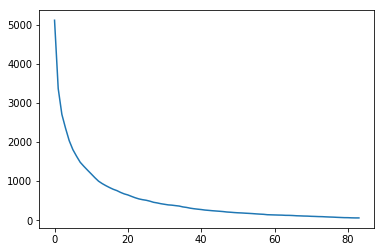

In [24]:
plt.plot(listError)
plt.show()

# Check the results on the test base 

In [25]:
df_test = pd.read_csv("./MNIST_dataset/mnist_test.csv", sep=',', header=None)

In [26]:
array_targetData_test = df_test.loc[:, 0].values
array_inputs_test = df_test.loc[:, 1:].values / 255.0 * 0.99 + 0.01

In [27]:
error = 0
for i in range(len(array_targetData_test)):
    formatedTarget = np.zeros(10) + 0.01
    formatedTarget[array_targetData_test[i]] = 0.99
    
    nn.train(array_inputs_test[i], formatedTarget)
    predictedResult = np.argmax(nn.predict(array_inputs_test[i]))
    if (predictedResult != array_targetData_test[i]):
        error += 1
print("Performance: " + str((1 - error / len(array_targetData_test)) * 100) + '%')

Performance: 98.96000000000001%
